![netflix-imdb-header.jpg](https://i.postimg.cc/rwj6wc7j/netflix-imdb-header.jpg)


Photo by <a href="https://unsplash.com/@surface?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Surface</a> on <a href="https://unsplash.com/s/photos/netflix?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  

# <font color='#E50914'> Netflix </font> Data Exploration

---
This notebook is a part of a Chapter assignment in the course. 
[Data Analysis with Python: Zero to Pandas](zerotopandas.com) <br>
The objective of this assignment is to perform an exploratory data analysis
**using seaborn / matplotlib** as visualizations.


Table of Contents
* [Downloading the Dataset](#first-bullet)
* [Data Preparation and Cleaning](#second-bullet)
* [Exploratory Analysis and Visualization](#third-bullet)
* [Asking and Answering Questions](#fourth-bullet)
* [Conlusion and Summary](#summary)

In [1]:
# !pip install squarify
!pip install pingouin

     |████████████████████████████████| 205 kB 864 kB/s 
  Created wheel for pingouin: filename=pingouin-0.3.12-py3-none-any.whl size=204286 sha256=6f054cf20dc138970ad7d299b424475976f94c5c64cd10130aba4c9d006d6625
  Stored in directory: /root/.cache/pip/wheels/5b/8a/ed/fafe2714a0f047d64fb582105b174b5e5218c82a0d787bbec4
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=204155251cbe00ce6e515f7b1c98e1bf40726c90929f005051650e7f1590e055
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils


In [2]:
import pandas as pd
import pingouin as pg
import numpy as np
import seaborn as sns
import seaborn as sns
import matplotlib
from matplotlib import style
import matplotlib.font_manager
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio
import squarify
import warnings
import os
# import opendatasets as od
%matplotlib inline

# set seaborn style
sns.set_style('darkgrid')
style.use('ggplot')

# plotly settings
pio.renderers = 'kaggle'

# set warning settings
warnings.filterwarnings(action='ignore')

# change default params in matplotlib
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['font.family'] = "roboto"
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Downloading the Dataset <a class="anchor" id="first-bullet"></a>


Let's begin by downloading the data, and listing the files within the dataset.

In [3]:
# dataset link from kaggle
dataset_url = 'https://www.kaggle.com/luiscorter/netflix-original-films-imdb-scores' 

# download data from url
od.download(dataset_url)

# data directory
data_dir = 'netflix-original-films-imdb-scores'

# list data
os.listdir(data_dir)

## Data Preparation and Cleaning <a class="anchor" id="second-bullet"></a>

- Load our data using Pandas
- Check heads, tails, and also view by sampling
- Know our dataset shape and Column names
- Check missing Values


In [4]:
# read dataset
netflix_df = pd.read_csv('netflix-original-films-imdb-scores/NetflixOriginals.csv')

In [5]:
# view data
netflix_df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [6]:
# check tail
netflix_df.tail()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English


In [7]:
# get samples
netflix_df.sample(5)

,Title,Genre,Premiere,Runtime,IMDB Score,Language
520,American Factory,Documentary,"August 21, 2019",110,7.4,English
311,The Heartbreak Club,Comedy-drama,"January 14, 2021",101,6.4,Indonesian
108,Been So Long,Musical,"October 26, 2018",100,5.5,English
546,Tell Me Who I Am,Documentary,"October 18, 2019",85,7.6,English
407,The Boys in the Band: Something Personal,Aftershow / Interview,"September 30, 2020",28,6.8,English


In [8]:
# check dataset shape
netflix_rows, netflix_cols = netflix_df.shape[0], netflix_df.shape[1]
netflix_column_names = netflix_df.columns
print(f'The Netflix Dataset contains {netflix_rows} rows and {netflix_cols} columns')

# print column names
print('All of the columns are the ff:')
for col_names in enumerate(netflix_column_names):
    print(col_names)

The Netflix Dataset contains 584 rows and 6 columns
All of the columns are the ff:
(0, 'Title')
(1, 'Genre')
(2, 'Premiere')
(3, 'Runtime')
(4, 'IMDB Score')
(5, 'Language')


In [9]:
# change column names
netflix_df.columns = netflix_df.columns.str.lower().\
    str.replace(' ', '_')

In [10]:
# check dataset info
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       584 non-null    object 
 1   genre       584 non-null    object 
 2   premiere    584 non-null    object 
 3   runtime     584 non-null    int64  
 4   imdb_score  584 non-null    float64
 5   language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [11]:
# convert premiere feature to datetime
netflix_df['premiere'] = pd.to_datetime(netflix_df.premiere)

In [12]:
# check for missing values
netflix_df.isnull().sum()

title         0
genre         0
premiere      0
runtime       0
imdb_score    0
language      0
dtype: int64

**Tables for Exploratory Data Analysis**

---

Titles and Genre

In [13]:
netflix_df.head()

,title,genre,premiere,runtime,imdb_score,language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian
3,The Open House,Horror thriller,2018-01-19,94,3.2,English
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi


In [14]:
# count available genre
netflix_genre_counts = netflix_df.genre.value_counts()

print(f'There are {len(netflix_genre_counts)} distinct genre.')
netflix_genre_counts

There are 115 distinct genre.


Documentary                             159
Drama                                    77
Comedy                                   49
Romantic comedy                          39
Thriller                                 33
                                       ... 
Hidden-camera prank comedy                1
Romantic comedy-drama                     1
Animation/Christmas/Comedy/Adventure      1
Horror comedy                             1
Teen comedy horror                        1
Name: genre, Length: 115, dtype: int64

In [15]:
# total titles by year
netflix_df['premiere_year'] = netflix_df.premiere.dt.year
netflix_titles_premiere_per_year = netflix_df.groupby('premiere_year').size()

netflix_titles_premiere_per_year

premiere_year
2014      1
2015      9
2016     30
2017     66
2018     99
2019    125
2020    183
2021     71
dtype: int64

In [16]:
# total titles by year with genre
crosstab_year_genre = pd.crosstab(index=netflix_df.premiere_year,
    columns=netflix_df.genre)

crosstab_year_genre

genre,Action,Action comedy,Action thriller,Action-adventure,Action-thriller,Action/Comedy,Action/Science fiction,Adventure,Adventure-romance,Adventure/Comedy,...,Teen comedy-drama,Thriller,Urban fantasy,Variety Show,Variety show,War,War drama,War-Comedy,Western,Zombie/Heist
premiere_year,,,,,,,,,,,,,,,,,,,,,
2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2016,0,2,0,0,0,0,0,1,0,0,...,0,2,0,0,0,1,0,0,0,0
2017,0,0,1,1,0,0,0,0,0,0,...,0,1,1,1,0,1,0,1,1,0
2018,0,0,0,0,2,1,0,1,0,1,...,1,3,0,0,0,0,0,0,1,0
2019,4,0,0,0,1,0,0,0,1,0,...,0,5,0,0,3,0,0,0,0,0
2020,2,3,0,0,0,0,0,0,0,0,...,0,18,0,0,1,0,1,0,0,0
2021,1,0,0,0,0,0,1,0,0,0,...,0,4,0,0,0,0,0,0,0,1


Runtimes and IMDB scores

In [17]:
# which titles has the longest runtimes
netflix_df.runtime.describe()

count    584.000000
mean      93.577055
std       27.761683
min        4.000000
25%       86.000000
50%       97.000000
75%      108.000000
max      209.000000
Name: runtime, dtype: float64

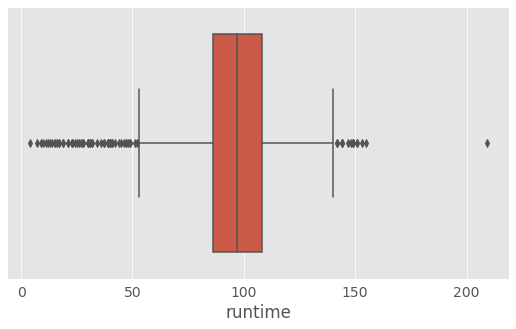

In [18]:
sns.boxplot(x=netflix_df.runtime);

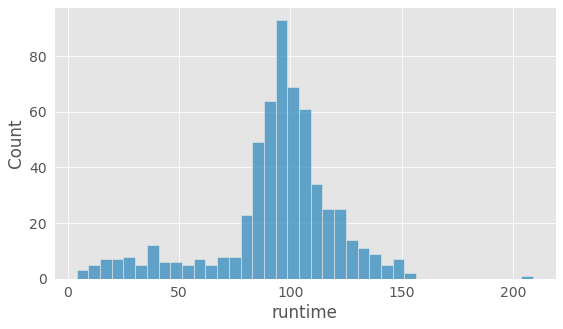

In [19]:
sns.histplot(netflix_df.runtime);

In [20]:
# get median runtime
runtime_median = netflix_df.runtime.median()
print(f'The median of runtime is {runtime_median}')

# check normality
pg.normality(netflix_df.runtime, method='normaltest')

The median of runtime is 97.0


,W,pval,normal
runtime,85.152272,3.231610e-19,False


In [21]:
# get outlier runtimes
netflix_longest_runtime = netflix_df[netflix_df.runtime >= 120]

# sort netflix values 
netflix_longest_runtime = netflix_longest_runtime.\
    sort_values(by='runtime', ascending=False)

In [22]:
# count long runtime titles
netflix_longest_runtime_count = netflix_longest_runtime.shape[0]
print(f'There are {netflix_longest_runtime_count} tiltes that is above 2 hours long.')

# view sample from longest runtimes var
netflix_longest_runtime.sample(5)

There are 74 tiltes that is above 2 hours long.


,title,genre,premiere,runtime,imdb_score,language,premiere_year
90,Things Heard & Seen,Horror,2021-04-29,121,5.3,English,2021
358,Space Sweepers,Science fiction,2021-02-05,136,6.6,Korean,2021
9,Sardar Ka Grandson,Comedy,2021-05-18,139,4.1,Hindi,2021
493,The Disciple,Drama,2021-04-30,129,7.2,Marathi,2021
365,Ajeeb Daastaans,Drama,2021-04-16,142,6.7,Hindi,2021


In [23]:
# get shortest runtime titles
netflix_shortest_runtime = netflix_df[netflix_df.runtime <= 50]
netflix_shortest_runtime = netflix_shortest_runtime.\
    sort_values(by='runtime', ascending=False).head(15)

In [24]:
# count long runtime titles
netflix_shortest_runtime_count = netflix_shortest_runtime.shape[0]
print(f'There are {netflix_shortest_runtime_count} titles that is less than an hour long.')

# view sample from shortest runtimes var
netflix_shortest_runtime.sample(5)

There are 15 titles that is less than an hour long.


,title,genre,premiere,runtime,imdb_score,language,premiere_year
442,ReMastered: Devil at the Crossroads,Documentary,2019-04-26,48,7.0,English,2019
541,The White Helmets,Documentary,2016-09-16,40,7.5,English,2016
459,End Game,Documentary,2018-05-04,40,7.1,English,2018
506,Octonauts & the Great Barrier Reef,Animation,2020-10-13,47,7.3,English,2020
133,Sarah Cooper: Everything's Fine,Variety show,2020-10-27,49,5.6,English,2020


In [25]:
# netflix multi language films
netflix_multilanguage_count = netflix_df[netflix_df.language.str.contains('/')]
multilanguage_size = len(netflix_multilanguage_count.language.value_counts())
print(f'There are {multilanguage_size} multilanguage languages in this dataset. All are combined with english.')

# netflix unique languages
netflix_total_languages = netflix_df.language.value_counts()
unique_language_size = len(netflix_total_languages)

print(f'There are {unique_language_size - multilanguage_size} monolingual languages in this dataset.')

There are 16 multilanguage languages in this dataset. All are combined with english.
There are 22 monolingual languages in this dataset.


In [26]:
# netflix use language of titles per year
netflix_language_in_years = pd.crosstab(index=netflix_df.premiere_year,
    columns=netflix_df.language)

## Exploratory Analysis and Visualization  <a class="anchor" id="third-bullet"></a>

#### What is the distribution of Netflixs' IMDB Score

In [27]:
# imdb_score feature distribution
netflix_df['imdb_score'].describe()

count    584.000000
mean       6.271747
std        0.979256
min        2.500000
25%        5.700000
50%        6.350000
75%        7.000000
max        9.000000
Name: imdb_score, dtype: float64

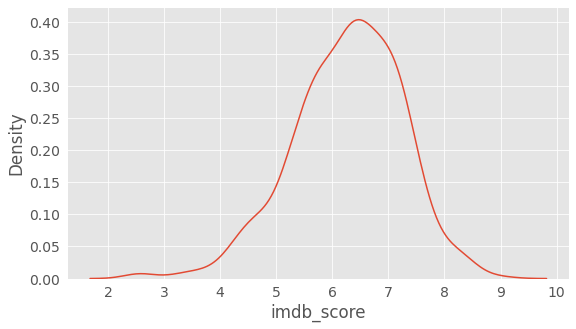

In [28]:
# imdb_score KDE (Kernel Density Estimate)
sns.kdeplot(data=netflix_df, x='imdb_score');

Our `imdb_score` is slight skewed to the left, we can check its normality with pingouins normality test function.

In [29]:
# is our imdb_score feature distributed normally?
pg.normality(netflix_df['imdb_score'])

,W,pval,normal
imdb_score,0.984515,0.000007,False


Here in our boxplot we can see on beyond our lower fence the extreme outliers in our feature.

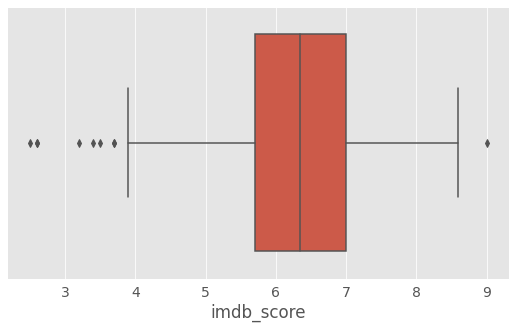

In [30]:
# Check outliers using seaborn boxplot
sns.boxplot(netflix_df.imdb_score);

#### How are the features correlated

Using seaborn's `pairplot()` function we can visualize pairwise(X,Y) features in a multiple scatter subplots.

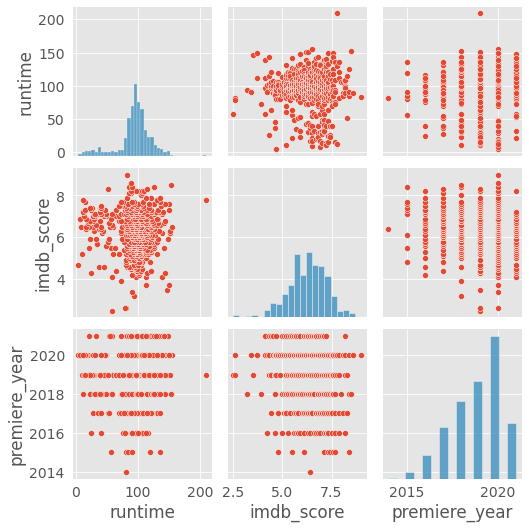

In [31]:
sns.pairplot(netflix_df);

The `imdb_score` and `runtime` feature seem show some kind of relationship. We can check
the correlation coefficient of our features using `pairwise_corr` in pingouin library.

In [32]:
# netflix pairwise correlation
netflix_pairwise = pg.pairwise_corr(netflix_df, method='pearson')
netflix_pairwise

,X,Y,method,tail,n,r,CI95%,p-unc,BF10,power
0,runtime,imdb_score,pearson,two-sided,584,-0.040896,"[-0.12, 0.04]",0.323839,0.084,0.166869
1,runtime,premiere_year,pearson,two-sided,584,0.069262,"[-0.01, 0.15]",0.094484,0.209,0.387345
2,imdb_score,premiere_year,pearson,two-sided,584,-0.141347,"[-0.22, -0.06]",0.000613,18.05,0.929586


#### What titles have the **<font color='green'> highest</font>** IMDB score

---

In [33]:
# sort values by imdb score with in descending order
netflix_df.sort_values(by='imdb_score', ascending=False).head(10).\
    style.background_gradient(subset=['imdb_score', 'premiere_year'], cmap='Greens')

,title,genre,premiere,runtime,imdb_score,language,premiere_year
583,David Attenborough: A Life on Our Planet,Documentary,2020-10-04 00:00:00,83,9.000000,English,2020
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08 00:00:00,89,8.600000,Portuguese,2020
581,Springsteen on Broadway,One-man show,2018-12-16 00:00:00,153,8.500000,English,2018
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09 00:00:00,91,8.400000,English/Ukranian/Russian,2015
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31 00:00:00,125,8.400000,English,2018
578,Ben Platt: Live from Radio City Music Hall,Concert Film,2020-05-20 00:00:00,85,8.400000,English,2020
577,Dancing with the Birds,Documentary,2019-10-23 00:00:00,51,8.300000,English,2019
576,Cuba and the Cameraman,Documentary,2017-11-24 00:00:00,114,8.300000,English,2017
573,Klaus,Animation/Christmas/Comedy/Adventure,2019-11-15 00:00:00,97,8.200000,English,2019
571,13th,Documentary,2016-10-07 00:00:00,100,8.200000,English,2016


![lifeontheplanet.jpg](https://i.postimg.cc/DZ6gGsSD/lifeontheplanet.jpg)

#### What titles have the **<font color='red'> lowest </font>** IMDB score

---

In [34]:
# sort values by imdb score, but this time ascending
netflix_df.sort_values(by='imdb_score', ascending=True).head(10).\
    style.background_gradient(subset=['imdb_score', 'premiere_year'], cmap='Reds_r')

,title,genre,premiere,runtime,imdb_score,language,premiere_year
0,Enter the Anime,Documentary,2019-08-05 00:00:00,58,2.500000,English/Japanese,2019
1,Dark Forces,Thriller,2020-08-21 00:00:00,81,2.600000,Spanish,2020
2,The App,Science fiction/Drama,2019-12-26 00:00:00,79,2.600000,Italian,2019
3,The Open House,Horror thriller,2018-01-19 00:00:00,94,3.200000,English,2018
4,Kaali Khuhi,Mystery,2020-10-30 00:00:00,90,3.400000,Hindi,2020
5,Drive,Action,2019-11-01 00:00:00,147,3.500000,Hindi,2019
6,Leyla Everlasting,Comedy,2020-12-04 00:00:00,112,3.700000,Turkish,2020
7,The Last Days of American Crime,Heist film/Thriller,2020-06-05 00:00:00,149,3.700000,English,2020
8,Paradox,Musical/Western/Fantasy,2018-03-23 00:00:00,73,3.900000,English,2018
9,Sardar Ka Grandson,Comedy,2021-05-18 00:00:00,139,4.100000,Hindi,2021


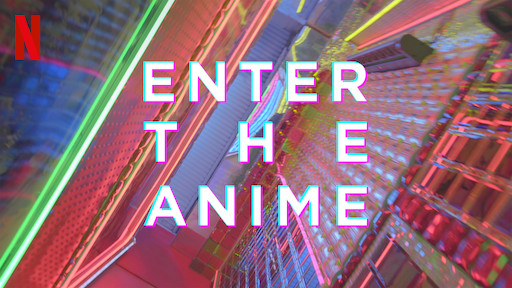

#### What is the median IMDB score in terms of genre?
The imdb score is not a normal distribution. So we'll be getting the median imdb_score.

In [35]:
# calculates the median for every genre
median_genre_imdb = netflix_df.groupby('genre')['imdb_score'].median()

# filter the genre with median less than or equal to 5
median_low_genre_imdb = median_genre_imdb[median_genre_imdb <= 5].\
    sort_values()

# filter the genre with median greather than or equal to 6
median_high_genre_imdb = median_genre_imdb[median_genre_imdb >= 6].\
    sort_values(ascending=False)

In [36]:
# view the top 15 lowest (median) imdb genre score
pd.DataFrame(median_low_genre_imdb[:15]).\
    style.background_gradient(subset=['imdb_score'], cmap='Reds_r')

,imdb_score
genre,
Heist film/Thriller,3.700000
Musical/Western/Fantasy,3.900000
Horror anthology,4.300000
Political thriller,4.300000
Horror thriller,4.400000
Superhero-Comedy,4.400000
Romance drama,4.600000
Mystery,4.650000
Anime / Short,4.700000


In [37]:
# view the top 15 highest (median) imdb genre score
pd.DataFrame(median_high_genre_imdb[:10]).\
    style.background_gradient(subset=['imdb_score'], cmap='Greens')

,imdb_score
genre,
Animation/Christmas/Comedy/Adventure,8.200000
Musical / Short,7.700000
Anthology/Dark comedy,7.600000
Concert Film,7.600000
Animation / Science Fiction,7.500000
Making-of,7.450000
Action-adventure,7.300000
Drama-Comedy,7.200000
Coming-of-age comedy-drama,7.200000


## Asking and Answering Questions <a class='anchor' id='fourth-bullet'></a>



#### **What genre do they frequently release in their titles?**

---

In [38]:
total_genre = netflix_genre_counts.value_counts().sum()
print(f'Netflix has a total of {total_genre} genre in its artillery of original films.')

Netflix has a total of 115 genre in its artillery of original films.


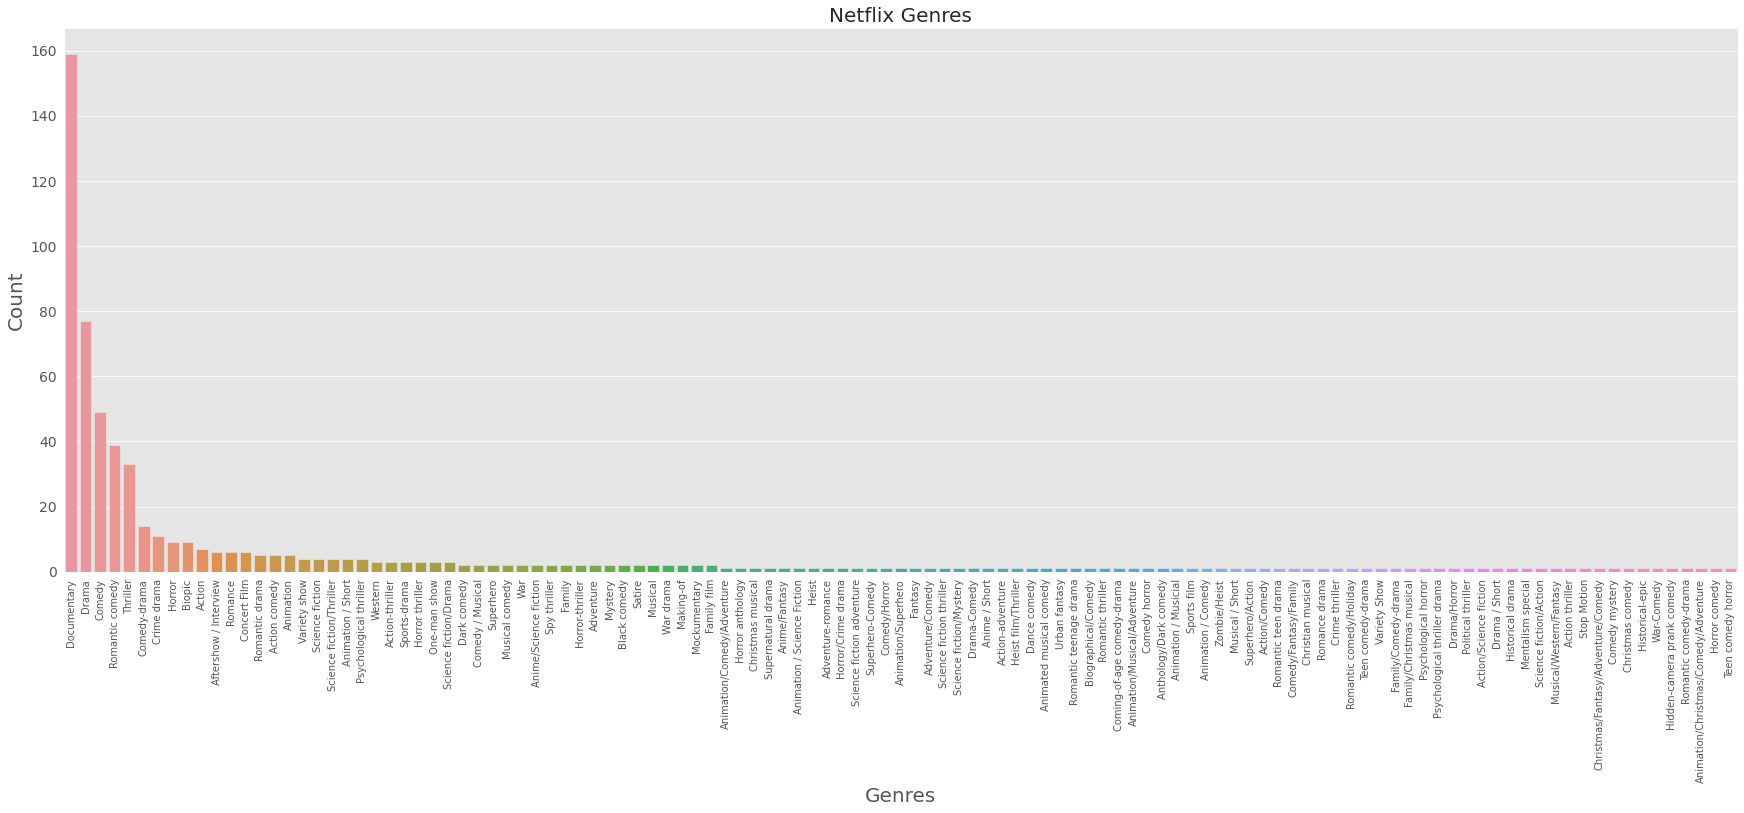

In [39]:
# arrange values
netflix_genre_counts = pd.DataFrame(netflix_genre_counts)

# get index as array
netflix_genre_names = np.array(netflix_genre_counts.index)

# flatten values
netflix_genre_values = netflix_genre_counts.values.flatten()

# figure size
f, ax = plt.subplots(figsize=(30, 10))

# create plot
genre_plot = sns.barplot(y=netflix_genre_values, x=netflix_genre_names);

# rotate x-axis text vertically
plt.setp(genre_plot.get_xticklabels(), rotation=90)
plt.xticks(fontsize=10)

# tweak labels
genre_plot.set_xlabel(xlabel='Genres', fontsize=20);
genre_plot.set_ylabel(ylabel='Count', fontsize=20);
genre_plot.set_title('Netflix Genres', fontsize=20);

In [40]:
# filter top 5
netflix_top_five_genre = netflix_df[(netflix_df.genre == 'Documentary')\
    | (netflix_df.genre == 'Drama')\
    | (netflix_df.genre == 'Comedy')\
    | (netflix_df.genre == 'Romantic comedy')\
    | (netflix_df.genre == 'Thriller')]

# use crosstab to count genre in years
crosstab_top_five_genre = pd.crosstab(
    netflix_top_five_genre.premiere_year, 
    netflix_top_five_genre.genre)

# marker colors
sub_colors = ['lightgray'] * 5
sub_colors[1] = '#E50914'

# create plotly figure
fig = go.Figure()

# for loop to add genres
color_list = 0
for genres in crosstab_top_five_genre.columns:
    fig.add_trace(go.Scatter(
        x=crosstab_top_five_genre.index,
        y=crosstab_top_five_genre[genres].values,
        mode='lines+markers',
        line_color=sub_colors[color_list],
        name=genres))
    
    color_list += 1

# tweak settings and names
fig.update_layout(template='plotly_white', width=780,
    title='<b>Top 5 Genre</b><br> Counts in Years')
fig.update_yaxes(title='Count')
fig.update_xaxes(title='Years', tickmode='linear')

# view plot
fig.show()

#### **How many films did they release through the years (2014-2021)**

---

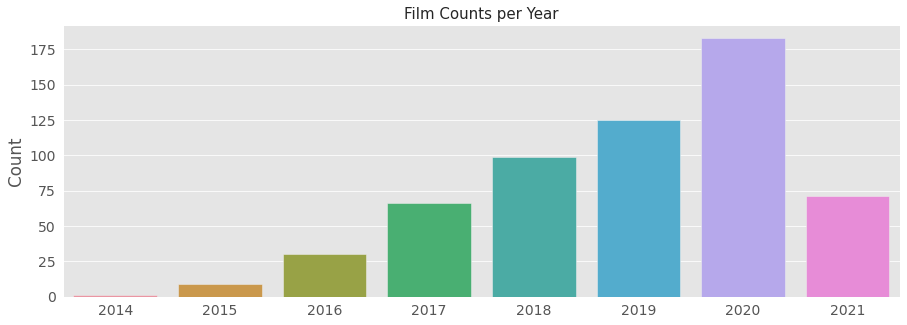

In [41]:
# convert to dataframe
netflix_year_title_counts = pd.DataFrame(netflix_titles_premiere_per_year)

# get index as array
netflix_years_names = np.array(netflix_year_title_counts.index)

# get values and flatten for viz
netflix_years_values = netflix_year_title_counts.values.flatten()

# figure size
f, ax = plt.subplots(figsize=(15,5))

# seaborn bar plot
netflix_year_plot = sns.barplot(x=netflix_years_names, y=netflix_years_values);

# set barplot title
netflix_year_plot.set_title('Film Counts per Year', fontsize=15);

# set ylabel title
netflix_year_plot.set_ylabel('Count');

#### How many films are released by year in Quarter1?

---

In [42]:
# filter first quarter
netflix_first_quarter = netflix_df[netflix_df['premiere'].dt.month <= 3]

# use datetime module to get month name
netflix_first_quarter['month'] =  netflix_df.premiere.dt.month_name()

# use crosstab to get counts in months and their designated years
netflix_first_quarter = pd.crosstab(netflix_first_quarter.month, netflix_first_quarter.premiere_year)

# flip data
netflix_first_quarter = netflix_first_quarter.T

# tweak columns in order
netflix_first_quarter = netflix_first_quarter[['January', 'February', 'March']]

In [43]:
# colors
colors = ['lightgray'] * 3
colors[0] = '#E50914'

fig = go.Figure()
line_color = 0
for columns in netflix_first_quarter.columns:
    fig.add_trace(go.Scatter(
        x=netflix_first_quarter.index,
        y=netflix_first_quarter[columns].values,
        name=columns,
        line_color=colors[line_color]
    ))
    line_color += 1
    
fig.update_layout(
    template='plotly_white', 
    title='<b>Quater1:</b> 2016-2021 <br> No. of Films Release',
    width=780)

fig.show()

#### **What titles had the longest rune time and which genre do they belong to?**

---

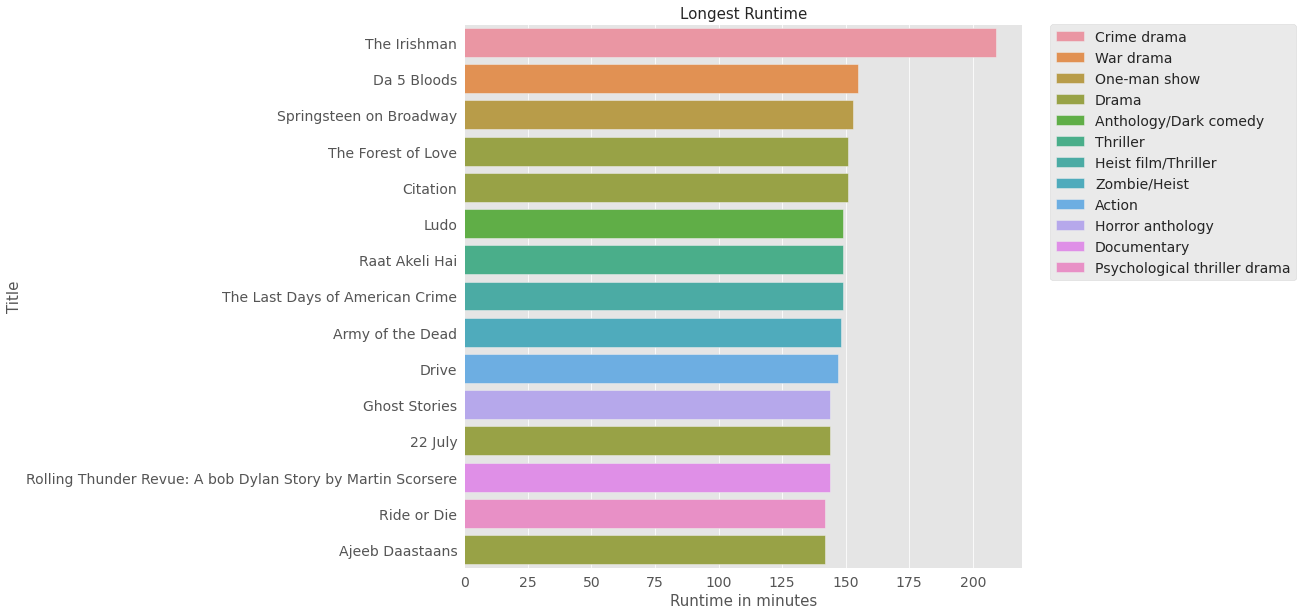

In [44]:
# top 15 longest runtime
netflix_longest_runtime = netflix_longest_runtime.head(15)

# figure size
f, ax = plt.subplots(figsize=(10,10))

# create barplot
netflix_runtime_plot = sns.barplot(
    y='title', x='runtime',
    hue='genre',
    data=netflix_longest_runtime,
    dodge=False);

# tweak title and labels
netflix_runtime_plot.set_title('Longest Runtime', fontsize=15)
netflix_runtime_plot.set_xlabel('Runtime in minutes', fontsize=15)
netflix_runtime_plot.set_ylabel('Title', fontsize=15)

# move legend to side
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

#### **What titles have the shortest runtime and what genre do they belong to?**

---

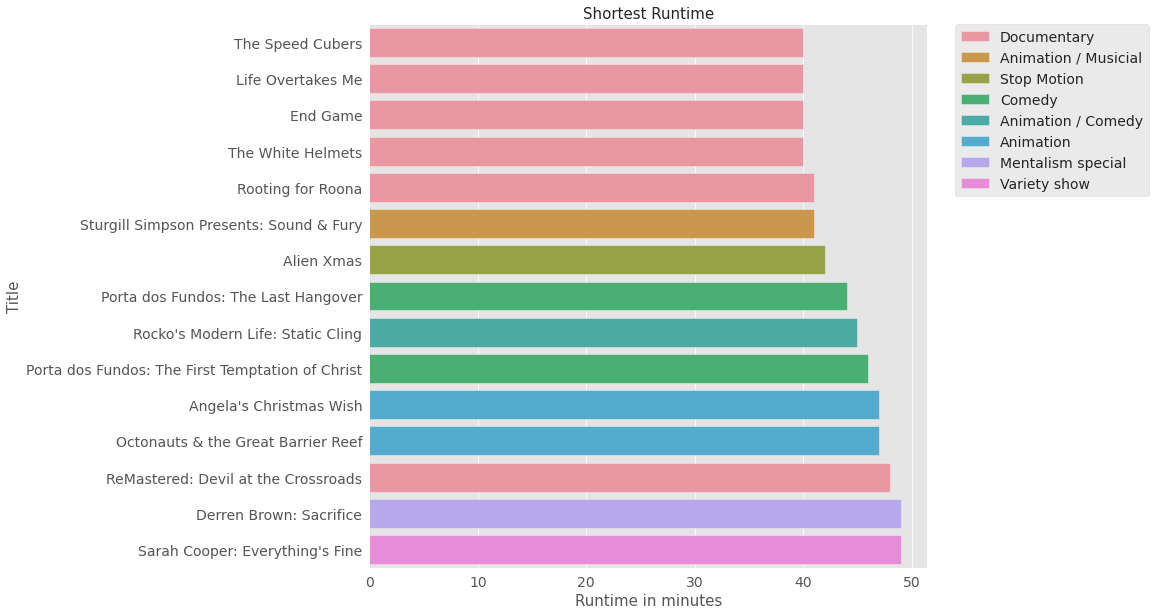

In [45]:
# final sort
netflix_shortest_runtime = netflix_shortest_runtime.sort_values(by='runtime')

# figure size
f, ax = plt.subplots(figsize=(10,10))

# create barplot
netflix_runtime_plot = sns.barplot(
    y='title', x='runtime',
    hue='genre',
    data=netflix_shortest_runtime,
    dodge=False);

# tweak title and labels 
netflix_runtime_plot.set_title('Shortest Runtime', fontsize=15)
netflix_runtime_plot.set_xlabel('Runtime in minutes', fontsize=15)
netflix_runtime_plot.set_ylabel('Title', fontsize=15)

# move legend to side
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

#### **What language are they in? (Except for english)**

---

In [46]:
# check top languages
netflix_total_languages.head()

English    401
Hindi       33
Spanish     31
French      20
Italian     14
Name: language, dtype: int64

In [47]:
# convert to dataframe
netflix_languages = pd.DataFrame(netflix_total_languages)

# drop english language from counts
netflix_languages = netflix_languages.drop(index='English')

# flatten array
netflix_langauges_values = netflix_languages.values.flatten()

# make array of label / names
netflix_langauges_labels = np.array(netflix_languages.index)

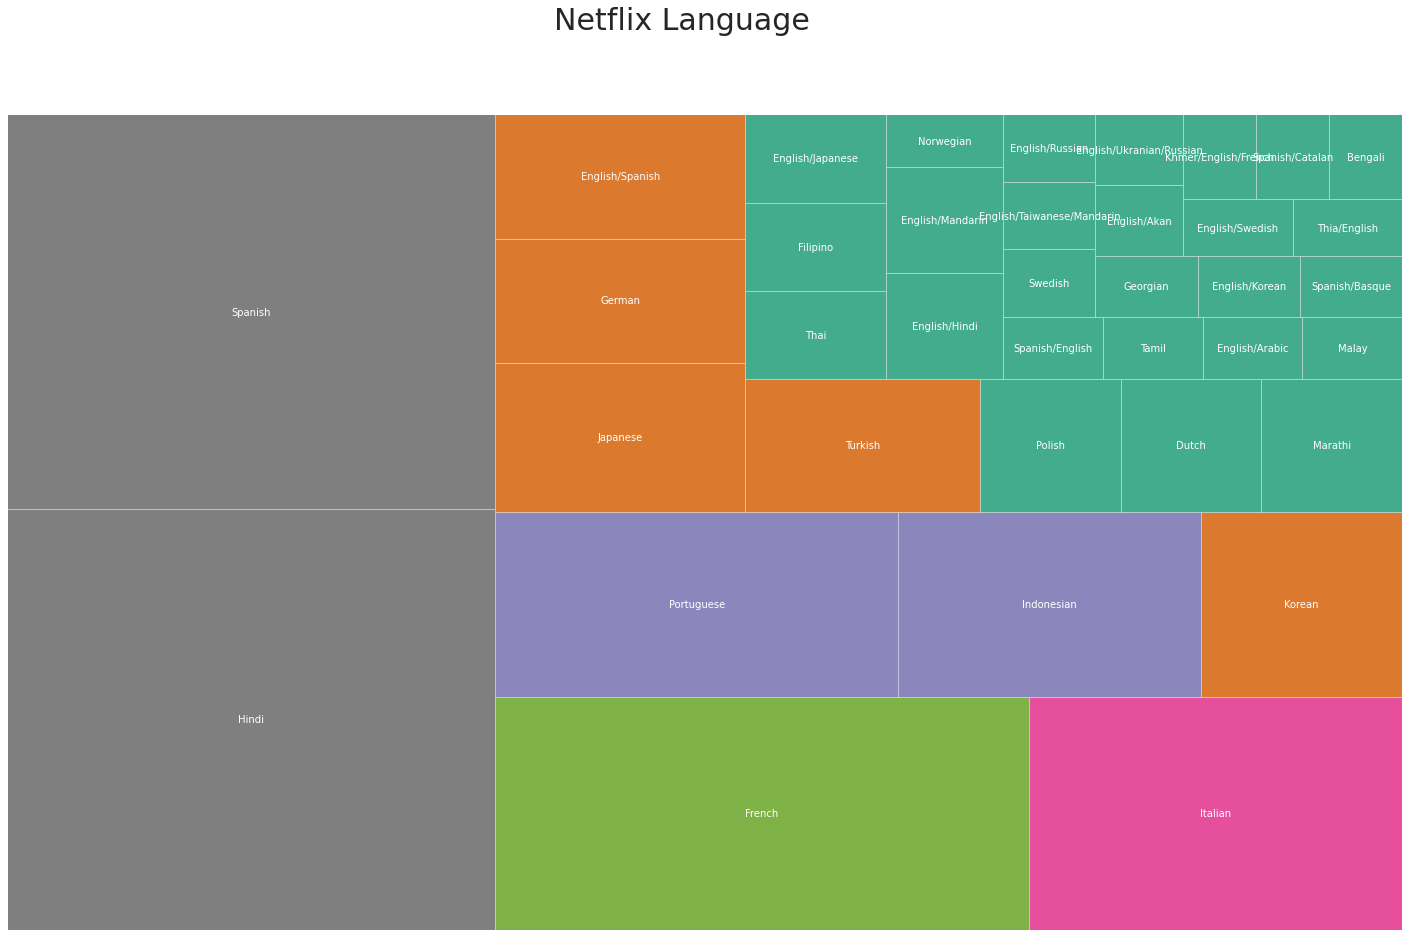

In [48]:
# set figure size
f, ax = plt.subplots(figsize=(25,15))

# add figure title
f.suptitle('Netflix Language', fontsize=30)

# tweak matplotlib cmap
cmap = matplotlib.cm.Dark2

# create min and max values for cmap
mini, maxi = netflix_langauges_values.min(), netflix_langauges_values.max()
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)

# use list comprehension to get color list
colors = [cmap(norm(value)) for value in netflix_langauges_values]

# create tree map using squarify library
netflix_language_treemap = squarify.plot(sizes=netflix_langauges_values,
    color=colors,
    label=netflix_langauges_labels, alpha=0.8,
    bar_kwargs={'alpha':.7},
    text_kwargs={'fontsize':10, 'color': 'white'});

# set axes to none
ax.set_xticks([]);
ax.set_yticks([]);

#### **What genre were prevalent through the years(2014-2021)**

---

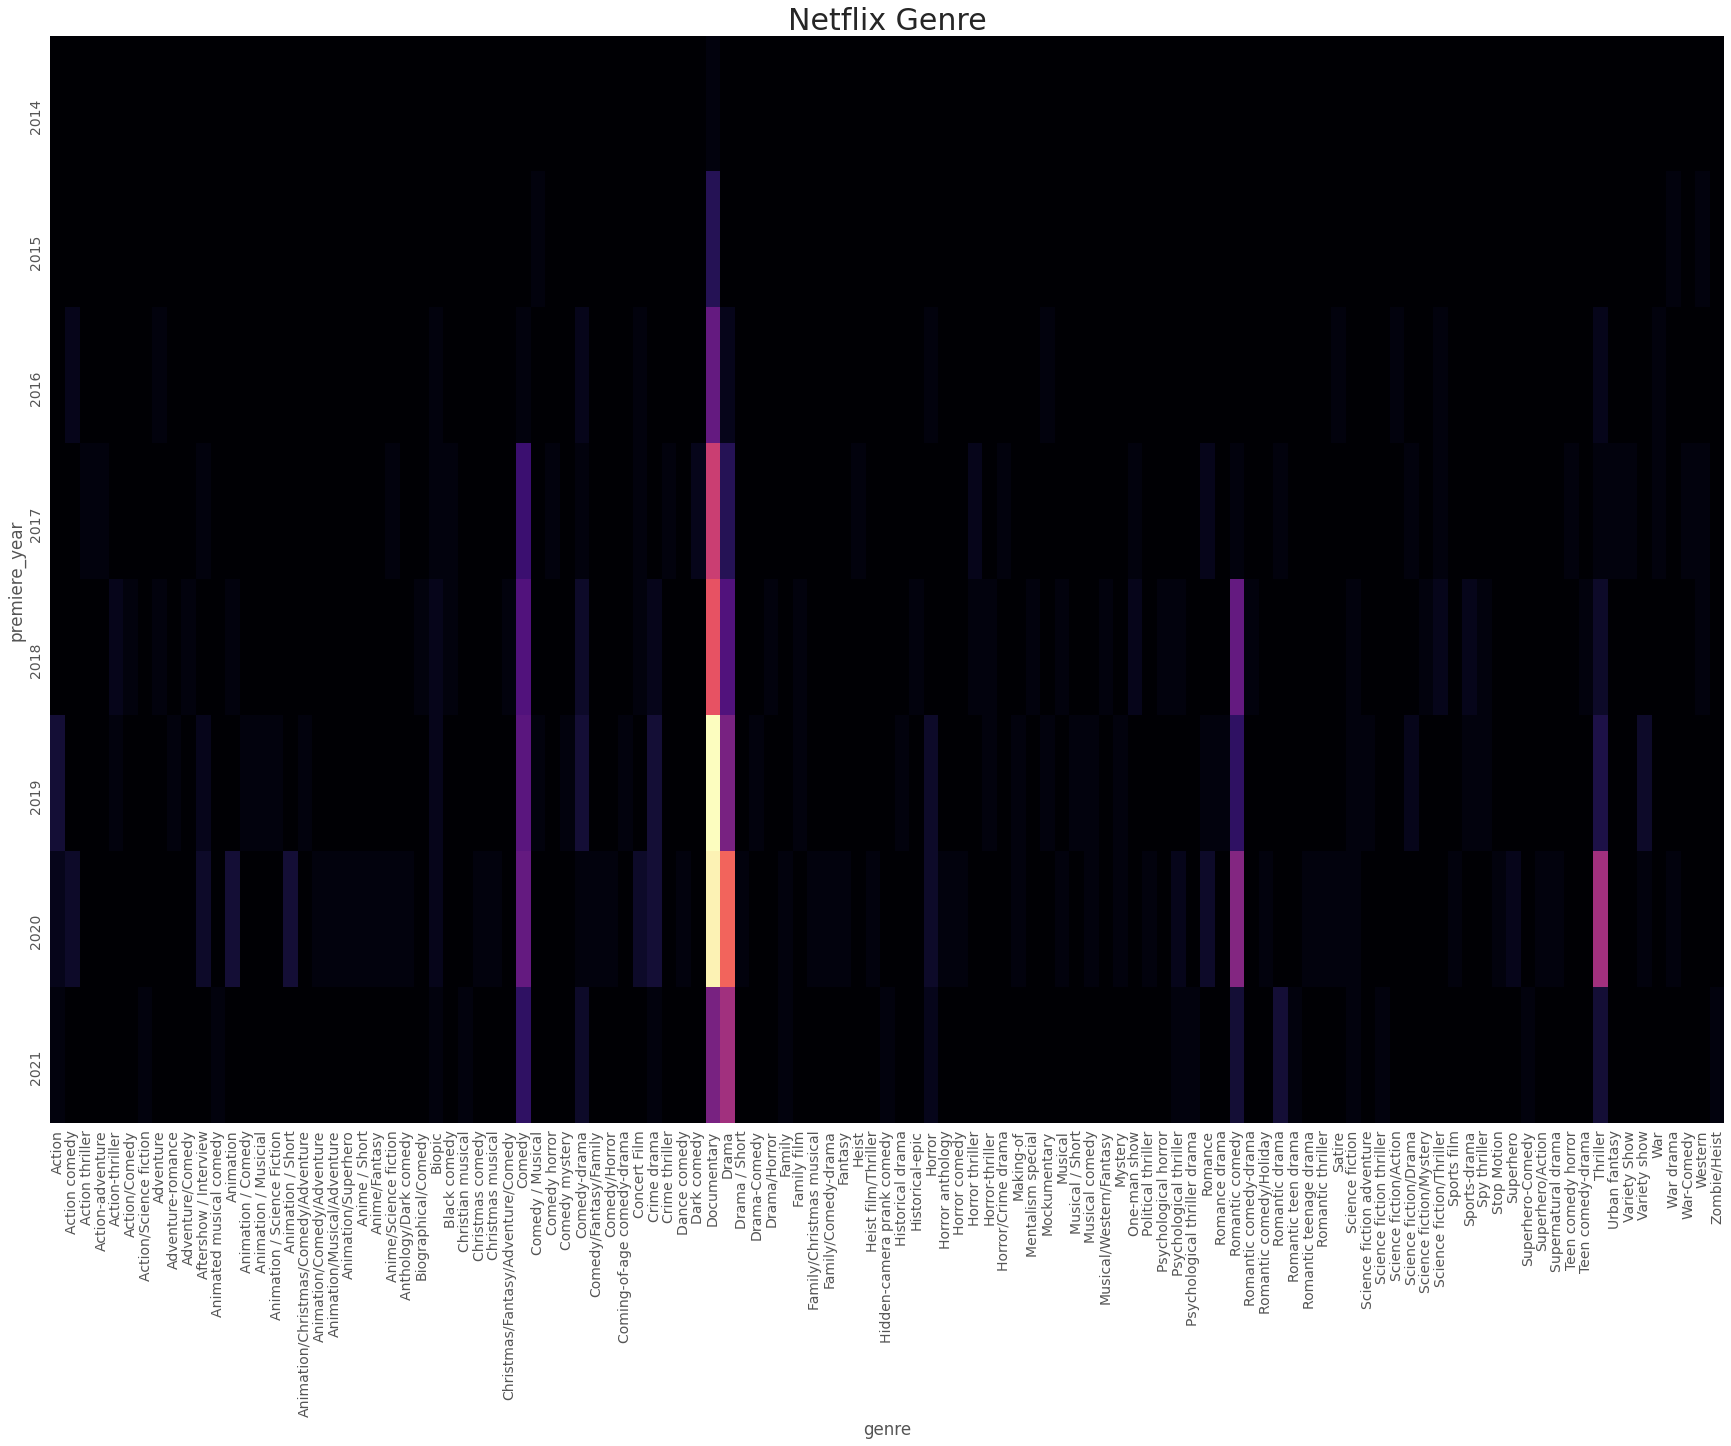

In [49]:
# set figure size
f, ax = plt.subplots(figsize=(30, 20))

# create seaborn heatmap reference crosstab year and genre
heatmap_genre_year = sns.heatmap(crosstab_year_genre, cbar=False, cmap="magma");

# set title and tweak fontsize
heatmap_genre_year.set_title('Netflix Genre', fontsize=30);

#### **What languages were prevalent through the years(2014-2021)**

---

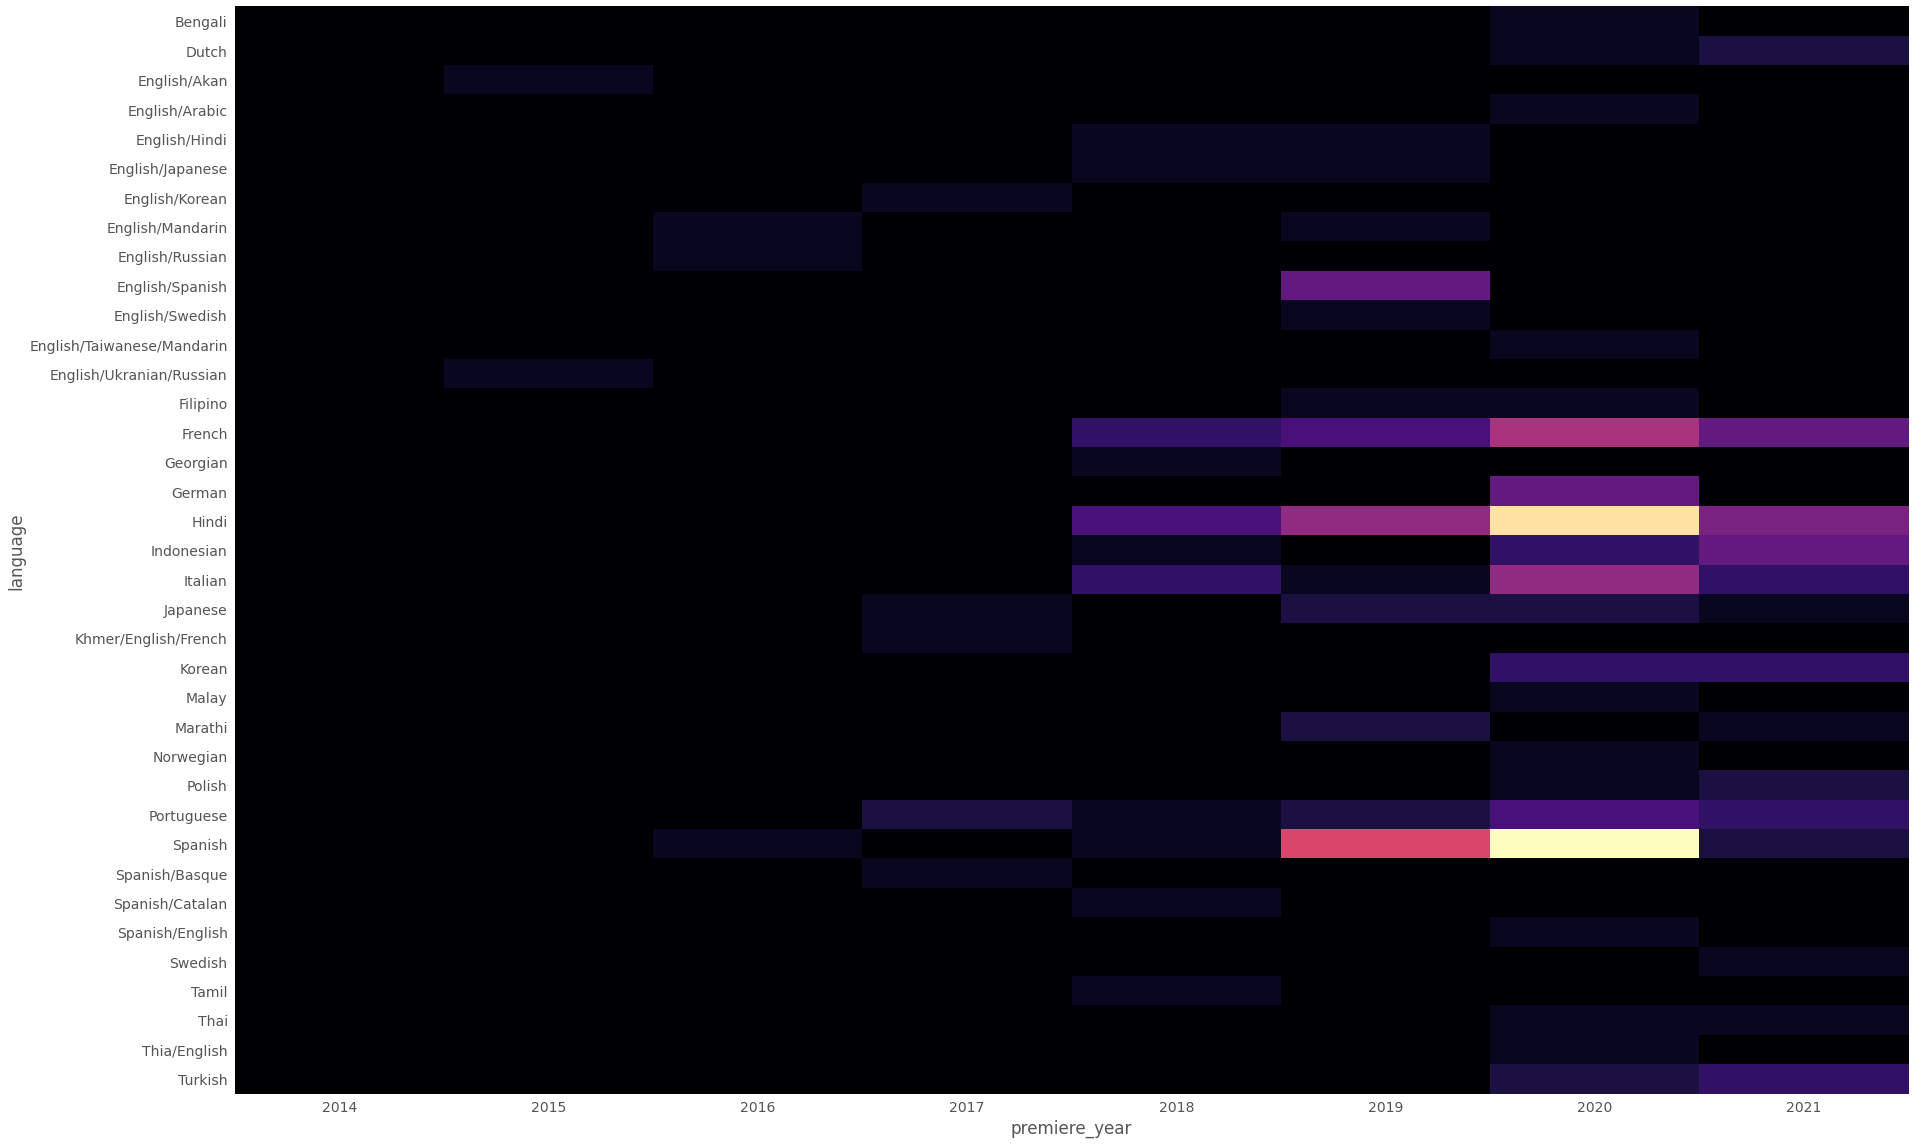

In [50]:
# set figure size
f, ax = plt.subplots(figsize=(30, 20))

# create a crosstab for year and language
crosstab_year_language = pd.crosstab(index=netflix_df.premiere_year,
    columns=netflix_df.language)

# drop english counts
crosstab_year_language = crosstab_year_language.drop(columns='English')

# plot heatmap using seaborn referencing crosstab
sns.heatmap(crosstab_year_language.T, cbar=False, cmap="magma");

## Inferences and Conclusion <a class='anchor' id='summary'></a>
Data Summary

---
- The data consist of `584 films` and 6 features.
- The data does not contain `NaN` values
- The 6 features are 
	- title, `object`-string
	- genre, `object`-string
	- premiere `object`-string
	- runtime `int`
	- imdb_score `float`
	- language `object`-string
- The dataset contains Netflix oringal titles `premiered_year` 2014-2021. Roughly 7 years of data.
- There are `115` unique genre in the dataset.

Feature `runtime`

---

- The median runtime (in minutes) is `97` with a standard deviation of `27.76`. However the feature is negatively 
skewed. Many of the titles/observations lie in very short runtimes.

- There are `74` titles that are above 2 hours and `15` titles that are less than an hour.
- The longest runtime title is `irish man`. The Top 15 of the longest runtimes has varying genre. While
The top 15 shortest runtime are more populated with documentary originals.

Feature `language`

---
- `English Language is the main language` used in these films. Followed by Spanish & Hindi.
- There are `23` multilanguage languages in this dataset. All are combined with english.
- There are `22` monolingual languages in this dataset.


Feature `genre`


---

- There's a total of `115` distinct genre is this dataset.
- `Documentary is the dominating genre` followed by Drama, Comedy, and Romantic Comedy
- There's an huge `uptrend of romantic comedy in 2018`. From 1 to 12.
- The number of `documentary films` almost `doubled` in years 2018 and 2019. From 25 to 40.
- The number of `thriller films` almost `quadrupled` in years 2019 and 2020 from 5 to 18.


Feature `imdb_score`

- imdb_score is slighly skewed to the left. With some outliers in the lower fence
	of the distribution
- imdb_score has a `min` of `2.5` and `max` of `9`

We can infer that:
- There seems to have a negative correlation between features `runtime` and `imdb_score`
- There seems to have a negative correlation between features `imdb_score` and `premiere_year`

Further statistical test should be considered.


Feature `imdb_score`

---
- imdb_score is slighly skewed to the left. With some outliers in the lower fence
	of the distribution
- imdb_score has a `min` of `2.5` and `max` of `9`

We can infer that:
- There seems to have a negative correlation between features `runtime` and `imdb_score`
- There seems to have a negative correlation between features `imdb_score` and `premiere_year`

Further statistical test should be considered.



## References and Future Work
   
   - Add other observations that did not make the summary
